<a href="https://colab.research.google.com/github/Phuc0417/AI_2023/blob/main/Face_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
from numpy import asanyarray, save
from numpy.core.multiarray import asarray
from keras.utils import load_img, img_to_array, to_categorical
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, Normalization, LeakyReLU
from keras.optimizers import Adam
from keras.layers.serialization import activation
from keras.losses import categorical_crossentropy
from os import listdir
from PIL import Image
import matplotlib.pyplot as plt
from google.colab import drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
folder = '/content/drive/MyDrive/AI/Face_Recognition/Picture_Train/'
photos, labels = list(), list()

In [9]:
for file in listdir(folder):
  output = 0.0
  if file.startswith('Nha'):
    output = 1.0
  if file.startswith('Thanh'):
    output = 2.0
  if file.startswith('Phuc'):
    output = 3.0
  if file.startswith('Tan'):
    output = 4.0

  photo = load_img(folder+file, target_size = (30,40))
  photo = img_to_array(photo)
  photos.append(photo)
  labels.append(output)

photos = asarray(photos)
labels = asarray(labels)

save('/content/drive/MyDrive/AI/Face_Recognition/afterpreprocessing/Face_photos.npy', photos)
save('/content/drive/MyDrive/AI/Face_Recognition/afterpreprocessing/Face_labels.npy', labels)

photos = np.load('/content/drive/MyDrive/AI/Face_Recognition/afterpreprocessing/Face_photos.npy')
labels = np.load('/content/drive/MyDrive/AI/Face_Recognition/afterpreprocessing/Face_labels.npy')

x_train = photos.astype('float32')/255
y_train = labels
y_train = to_categorical(y_train, num_classes=5)


model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='linear', input_shape=(30, 40, 3), padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2, 2), padding='same'))

model.add(Conv2D(64, (3, 3), activation='linear', padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2, 2), padding='same'))

model.add(Conv2D(128, (3, 3), activation='linear', padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2, 2), padding='same'))

model.add(Flatten())
model.add(Dense(128, activation='linear'))
model.add(LeakyReLU(alpha=0.1))
model.add(Dense(5, activation='softmax'))

model.compile(loss = categorical_crossentropy,
              optimizer = Adam(),
              metrics = ['accuracy'])
train = model.fit(x_train, y_train, batch_size = 50, epochs = 3, verbose = 1)

Epoch 1/3
5/5 [==============================] - 9s 55ms/step - loss: 1.3709 - accuracy: 0.3462
Epoch 2/3
5/5 [==============================] - 0s 5ms/step - loss: 0.8935 - accuracy: 0.7650
Epoch 3/3
5/5 [==============================] - 0s 5ms/step - loss: 0.4258 - accuracy: 0.8419


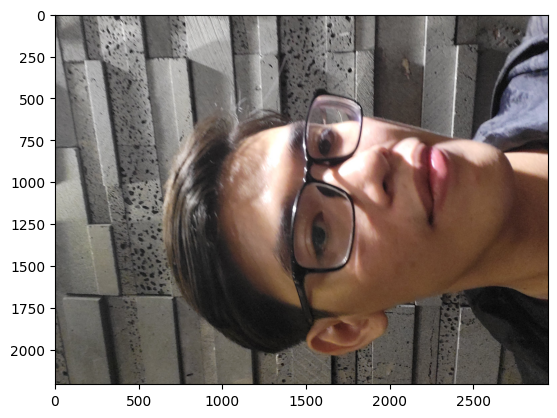

1/1 [==============================] - 0s 28ms/step
Bạn:  Phúc


In [13]:
img = Image.open('/content/drive/MyDrive/AI/Face_Recognition/Picture_Test/Phuc (64).jpg')

IMG = img
img = img.resize((30, 40))

img = np.asarray(img)
img = img.reshape(1,30,40,3)
img = img.astype('float32') / 255.0

plt.imshow(IMG)
plt.show()

matrix = np.argmax(model.predict(img), axis=-1)
class_names = ["Không biết","Nhã","Thành","Phúc","Tấn"]

temp1 = matrix[0]
print("Bạn: ", class_names[temp1])